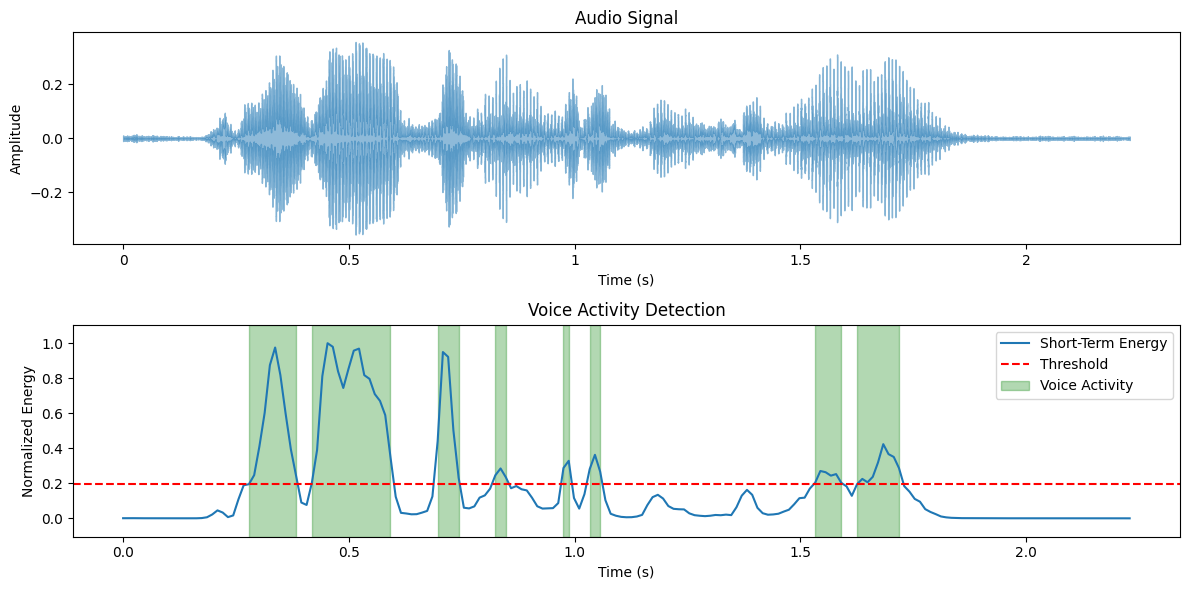

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load an audio file
audio_path = 'Data/speech_1.wav'  # Replace with your audio file path
signal, sr = librosa.load(audio_path, sr=None)

# Define frame size and hop size
frame_size = 1024
hop_size = 512

# Compute short-term energy
def compute_short_term_energy(signal, frame_size, hop_size):
    energy = []
    for i in range(0, len(signal), hop_size):
        frame = signal[i:i + frame_size]
        energy.append(np.sum(frame ** 2))
    return np.array(energy)

energy = compute_short_term_energy(signal, frame_size, hop_size)

# Normalize energy
energy = energy / np.max(energy)

# Set a threshold for voice activity
# threshold = 0.01 

# Analyze energy to set a dynamic threshold
mean_energy = np.mean(energy)
std_energy = np.std(energy)
threshold = mean_energy + 0.1 * std_energy  

# Detect voice activity
voice_activity = energy > threshold

# Plot the results
time = np.arange(len(energy)) * (hop_size / sr)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.waveshow(signal, sr=sr, alpha=0.5)
plt.title('Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(time, energy, label='Short-Term Energy')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.fill_between(time, 0, 1, where=voice_activity, color='green', alpha=0.3, transform=plt.gca().get_xaxis_transform(), label='Voice Activity')
plt.title('Voice Activity Detection')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Energy')
plt.legend()

plt.tight_layout()
plt.show()